
**Dupla: Marcela Cavalcante e Pedro Assis**
---



**Imports e Setup**

In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from matplotlib.colors import ListedColormap

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# **1 - K-Means e Métricas**

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
# Limitando dataset para apenas as pétalas
iris_petals = iris_df.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 1)
iris_petals

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


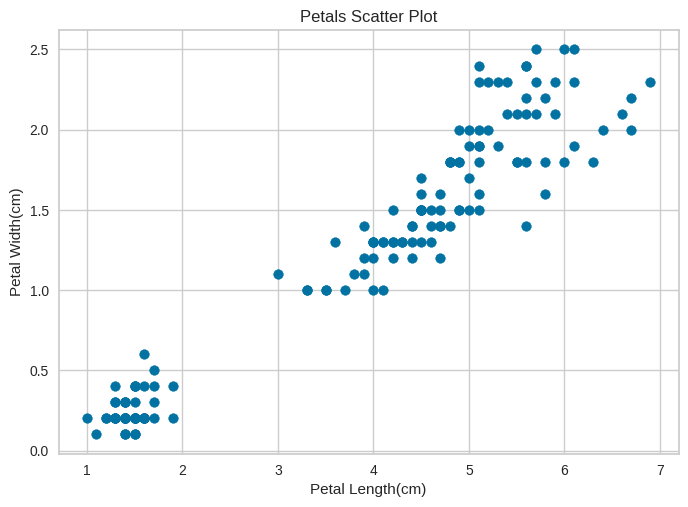

In [ ]:
# Visualizando dispersão das características das pétalas
length = iris_petals['petal length (cm)']
width = iris_petals['petal width (cm)']

plt.scatter(length, width)
plt.xlabel('Petal Length(cm)')
plt.ylabel('Petal Width(cm)')
plt.title('Petals Scatter Plot')
plt.show()

É aparente que um grupo de flores tem pétalas bem menores que a outras.

In [ ]:
#padronizando os dados
scaler = MinMaxScaler()
scaled_petals = pd.DataFrame(scaler.fit_transform(iris_petals))
scaled_petals.head()

,0,1
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


Foi escolhido o uso do Min-Max Scaler para padronizar os dados porque o iris dataset não possui outliers extremamente significativos. Então, dentro das técnicas lineares de padronização, esta foi vista como mais apropriada.

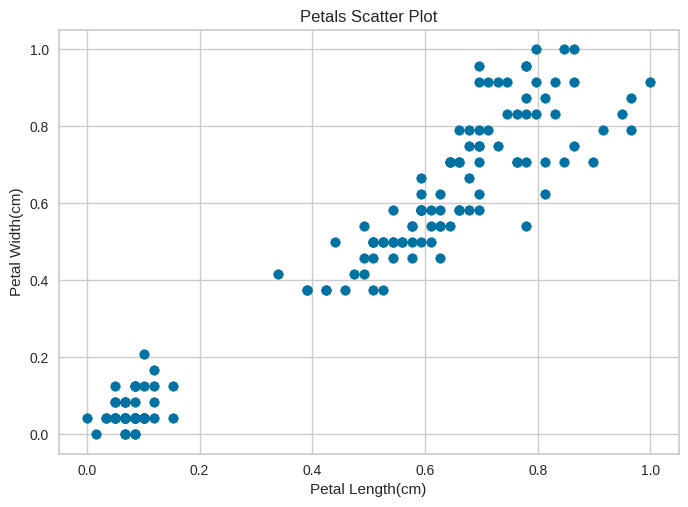

In [ ]:
# Dispersão após a padronização
length = scaled_petals[0]
width = scaled_petals[1]

plt.scatter(length, width)
plt.xlabel('Petal Length(cm)')
plt.ylabel('Petal Width(cm)')
plt.title('Petals Scatter Plot')
plt.show()

Como se pode observar, a distribuição das características das pétalas continua a mesma, mesmo após a padronização com o Min-Max Scaler.

O objetivo agora é criar modelos K-means e treiná-los no iris dataset.

Primeiro vamos crialos de acordo com os grupos que podemos visualizar.

Depois vamos crialos novamente usando o método Elbow baseado na inércia

Text(0.5, 1.0, 'KMeans Clustering com Centroides')

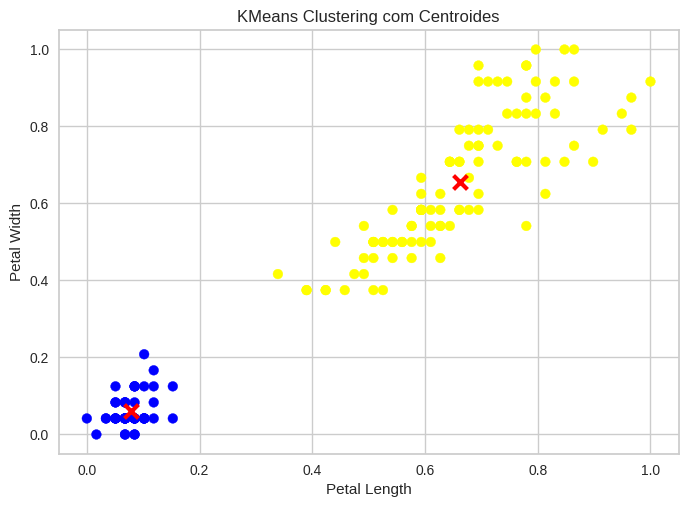

In [ ]:
# De acordo com a visualização
# Criando um k-means model com 2 clusters
kmeans = KMeans(n_clusters=2, n_init=10)

# Treinando o modelo
kmeans.fit(scaled_petals)

# Adquirindo as centroides para cada grupo
centroides = kmeans.cluster_centers_

# Adquirindo labels para cada ponto
labels = kmeans.labels_

colors = ListedColormap(['yellow', 'blue'])

# Plotando a dispersão
plt.scatter(length, width, c=labels, cmap=colors)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=100, linewidths=3, color='red')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('KMeans Clustering com Centroides')

Text(0.5, 1.0, 'KMeans Clustering com Centroides')

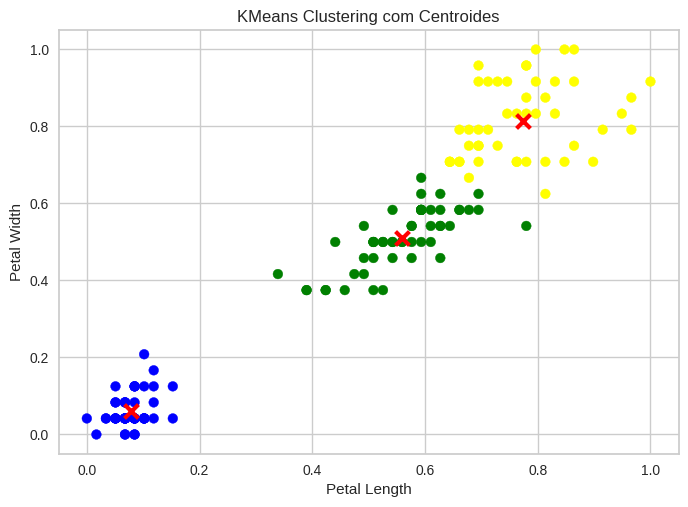

In [ ]:
# De acordo com a visualização
# Criando um k-means model com 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10)

# Treinando o modelo
kmeans.fit(scaled_petals)

# Adquirindo as centroides para cada grupo
centroides = kmeans.cluster_centers_

# Adquirindo labels para cada ponto
labels = kmeans.labels_

colors = ListedColormap(['yellow', 'blue', 'green'])

# Plotando a dispersão
plt.scatter(length, width, c=labels, cmap=colors)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=100, linewidths=3, color='red')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('KMeans Clustering com Centroides')

Observar os grupos quando K = 2 foi relativamente fácil, pois se mostram bem divididos. No entanto, quando k = 3, a visualização foi mais difícil. No entanto, é possível perceber que um k = 3 também é possível devido a grande distribuição dos dados. 

Lista de Inercias:  [28.368353219727197, 5.176463590044368, 1.701874688192097, 1.1588792731667124, 0.8538617353912241, 0.6798101576314027, 0.5673451458363143, 0.48701421432539393, 0.4136372577940615, 0.3768550049918249]





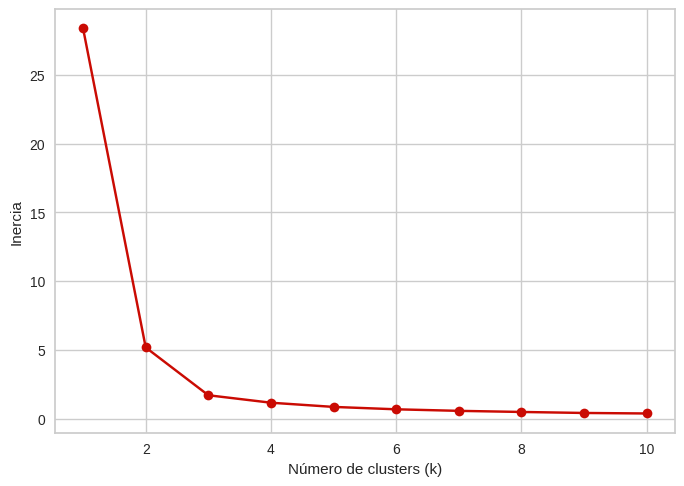

In [ ]:
# Método Elbow baseado na inércia
# Descobrindo o melhor valor de K
# Calculando inercias para diferentes valores de K
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(scaled_petals)
    inertias.append(kmeans.inertia_)

print('Lista de Inercias: ', inertias)
print('\n\n')
# Plotando a Curva do Cutuvelo
plt.plot(range(1, 11), inertias, marker='o', color='r')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.show()

Utilizando a curva do cutuvelo baseado na inercia encontramos a curva entre os valores de K = 2 e K = 3. É pouco difícil perceber apenas por visualização e podemos ficar em dúvida sobre qual pode ser o melhor valor de K.

Dessa forma, vamos utilzar o silhouette score para analizar diferentes valores de K. Dentre eles vamos escolher o valor de K que nos der o maior Silhouette Score.

Valor de K com maior Silhouette Score:  2





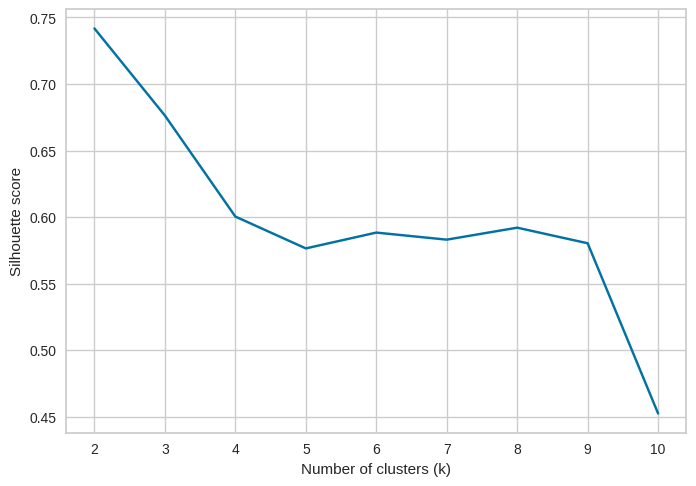

In [ ]:
# Silhouette Score
# Descobrindo o melhor valor de K
silhouette_scores = []

# Calculando o valor da Silhouette para um range de valores de K
for k in range(2,11):
  kmeans= KMeans(n_clusters=k, n_init=10)
  labels = kmeans.fit_predict(scaled_petals)
  score = silhouette_score(scaled_petals, labels)
  silhouette_scores.append(score)

# Calculando o K com maior Silhouette.
highest_k = silhouette_scores.index(max(silhouette_scores)) + 2
print('Valor de K com maior Silhouette Score: ', highest_k)
print('\n\n')

# Plotando valor da Slihouette(eixo y) e o valor de k(eixo x).
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show()

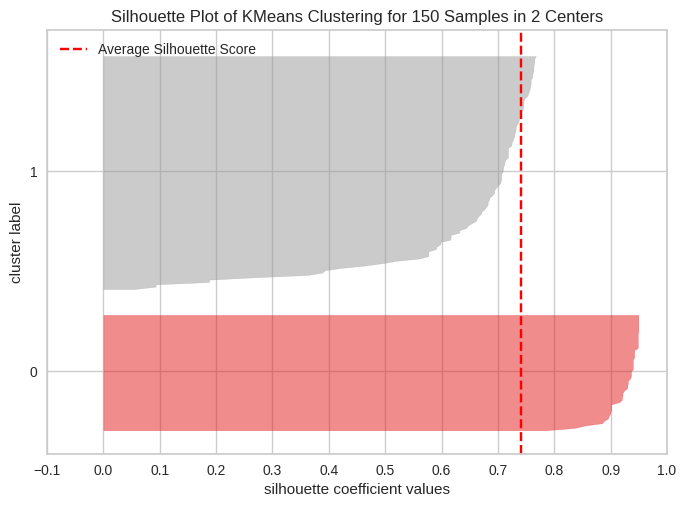

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Fazendo uma nova clusterização com o melhor valor de K
kmeans = KMeans(n_clusters = highest_k, n_init=10)
labels = kmeans.fit_predict(scaled_petals)

# Visualização
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(scaled_petals)
visualizer.poof()

Através desse clustering podemos ver que um dos cluster está muito maior que o outro. Então podemos assumir que há algo estranho acontecendo. Para testar nossa hipótese podemos visualizar o clustering com outros valores de K que talvez nos mostrem resultados que façam mais sentido.

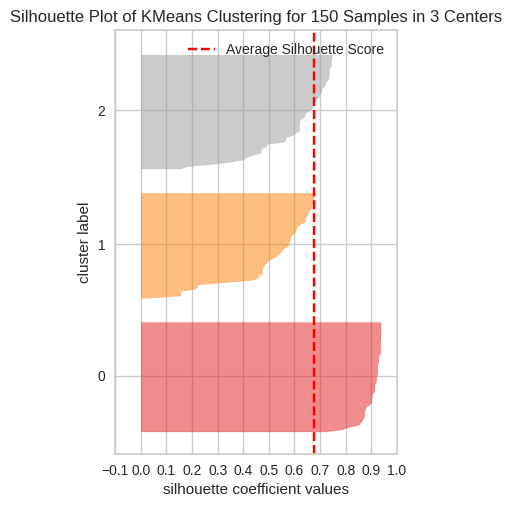

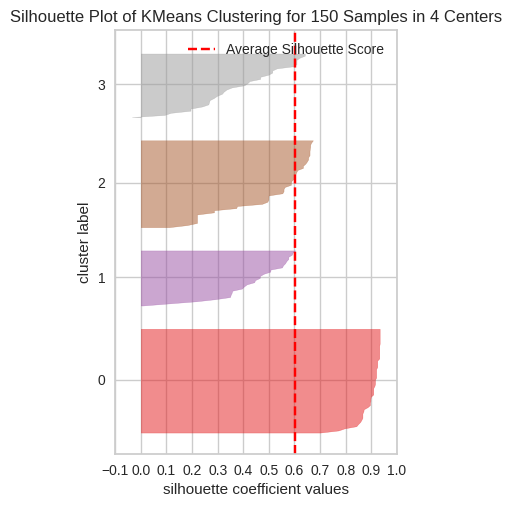

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Novas clsuterizações

# visualizador 1
kmeans1 = KMeans(n_clusters = 3, n_init=10)
labels1 = kmeans1.fit_predict(scaled_petals)
plt.subplot(1,2,1)
visualizer1 = SilhouetteVisualizer(kmeans1)
visualizer1.fit(scaled_petals)
visualizer1.poof()

# visualizador 2
kmeans2 = KMeans(n_clusters = 4, n_init=10)
labels = kmeans2.fit_predict(scaled_petals)
plt.subplot(1,2,2)
visualizer2 = SilhouetteVisualizer(kmeans2)
visualizer2.fit(scaled_petals)
visualizer2.poof()

Podemos perceber que 3 ou 4 clusters fazem mais sentido que apenas 2, devido a como os agrupamentos estão se comportando nos gráficos.

Agora, o que resta fazer é comparar nosso resultado com a verdadeira distribuição do dataset Iris.

In [ ]:
colors = ListedColormap(['yellow', 'blue', 'green'])

Text(0.5, 1.0, 'Clusterização Atingida com 2 clusters: Resultado do Silhouette Score')

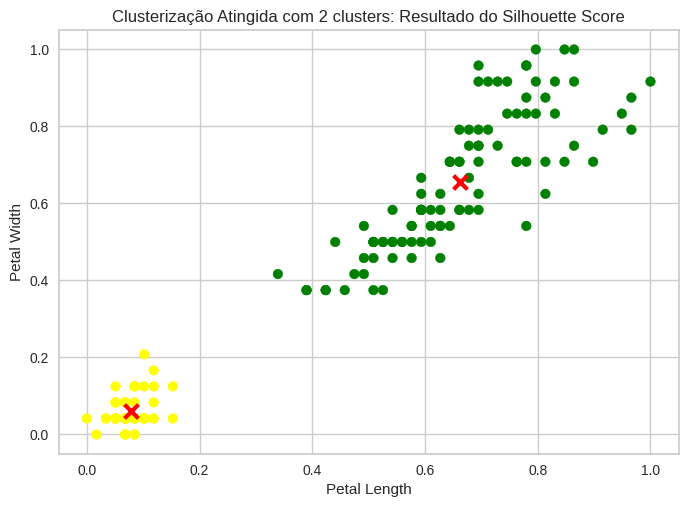

In [ ]:
# Distribuições atingida com 2 clusters
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(scaled_petals)
centroides = kmeans.cluster_centers_
labels = kmeans.labels_
plt.scatter(length, width, c=labels, cmap=colors)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=100, linewidths=3, color='red')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Clusterização Atingida com 2 clusters: Resultado do Silhouette Score')

Text(0.5, 1.0, 'Clusterização Atingida com 3 clusters: Resultado do Silhouette Score')

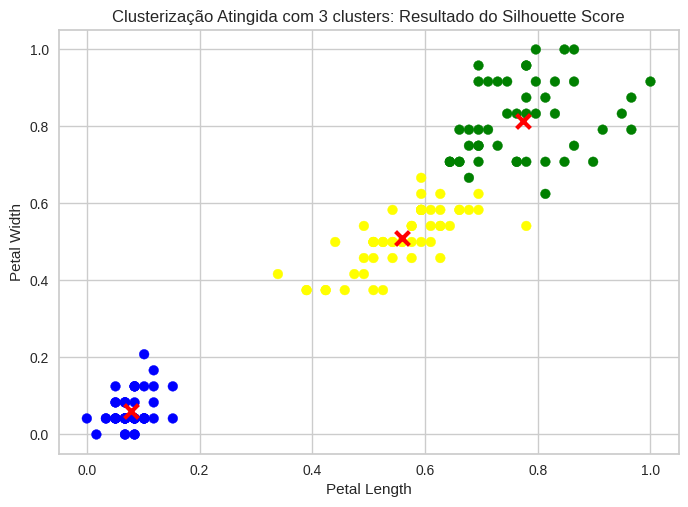

In [ ]:
# Distribuição atingida com 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(scaled_petals)
centroides = kmeans.cluster_centers_
labels = kmeans.labels_
plt.scatter(length, width, c=labels, cmap=colors)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=100, linewidths=3, color='red')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Clusterização Atingida com 3 clusters: Resultado do Silhouette Score')

Text(0.5, 1.0, 'Clusterização Verdadeira do Dataset')

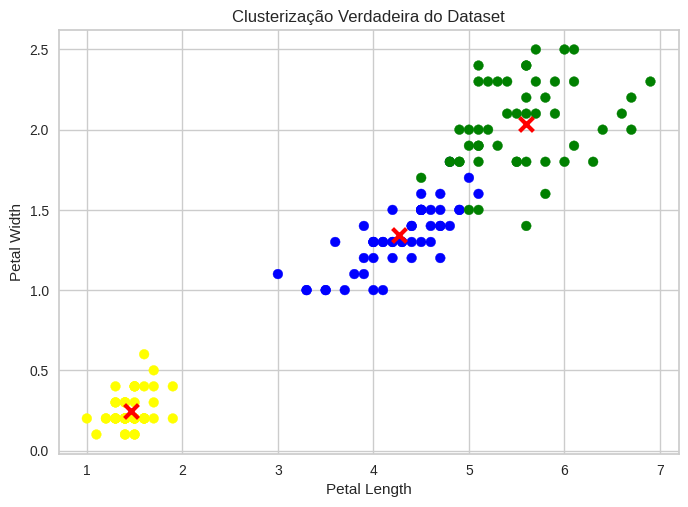

In [ ]:
old_length = iris_petals['petal length (cm)']
old_width = iris_petals['petal width (cm)']

# Distribuição Real
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(iris_petals)
centroides = kmeans.cluster_centers_
plt.scatter(old_length, old_width, c=iris.target, cmap=colors)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=100, linewidths=3, color='red')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Clusterização Verdadeira do Dataset')

Como podemos perceber, quando executamos o KMeans com o número de K igual a 3, temos uma distribuição igual à verdadeira distribuição do dataset.

Também é possível visualizar pelos scatter plots acima, descobrimos que a quantidade verdadeira de clusters no dataset é 3. Ou seja, 3 espécies de flores iris foram coletadas para a base de dados.

Enquanto isso, nossa primeira hipótese e observação sobre o número de clusters sendo igual a 2 estava equivocada.

# **2 - Clustering Hierárquico**

O objetivo dessa seção é realizar um experimento com Clustering hierárquico, aplicando diferentes distâncias em dendrogramas do dataset iris.

In [ ]:
# Realizando Clustering Aglomerativo
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single') # com essas configurações, manipulamos o clustering aglomerativo para executar como um clustering hierárquico.
model.fit(scaled_petals)

children = model.children_
print(children)

[[  0   1]
 [150   4]
 [151   8]
 [152  28]
 [153  33]
 [154  47]
 [155  49]
 [  2  36]
 [157  38]
 [158  42]
 [  3   7]
 [160  10]
 [161  27]
 [162  34]
 [163  39]
 [164  48]
 [ 11  25]
 [166  29]
 [167  30]
 [168  46]
 [ 14  35]
 [  6  17]
 [171  45]
 [ 40  41]
 [ 15  21]
 [174  31]
 [  9  32]
 [ 12  37]
 [ 57  93]
 [ 60  79]
 [ 53  71]
 [180  89]
 [ 88  99]
 [ 94  96]
 [ 74  97]
 [ 65  75]
 [ 50  63]
 [ 51  66]
 [187  68]
 [188  78]
 [189  84]
 [ 52  72]
 [123 127]
 [ 70 126]
 [193 138]
 [101 142]
 [116 137]
 [136 140]
 [169  20]
 [  5  26]
 [ 80  69]
 [181 182]
 [183 184]
 [ 87  55]
 [203  58]
 [186  76]
 [ 54 190]
 [191 119]
 [207 133]
 [195 146]
 [110 113]
 [210 121]
 [ 62  67]
 [196 103]
 [139 112]
 [214 128]
 [100 109]
 [115 145]
 [156 159]
 [172 173]
 [218 165]
 [220 198]
 [221 170]
 [219  19]
 [199 175]
 [176 177]
 [ 82  92]
 [201 202]
 [227 204]
 [ 91 205]
 [206  86]
 [192 194]
 [211 147]
 [215 124]
 [148 217]
 [234 141]
 [185 229]
 [231 149]
 [143 135]
 [223  18]
 [222  22]

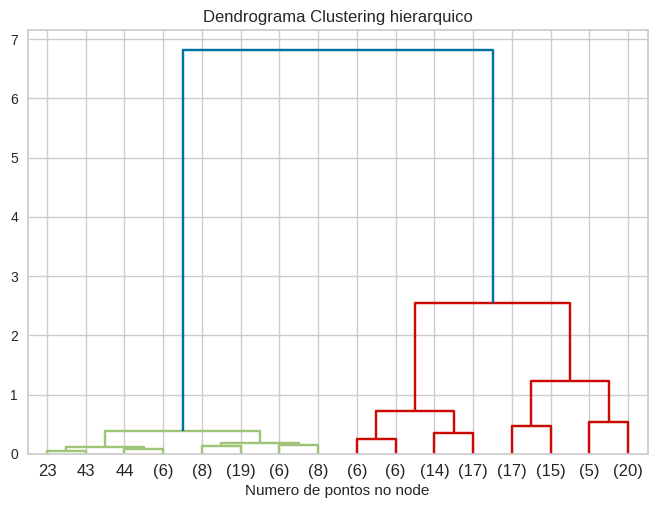

In [ ]:
# Visualizando os resultados através do plot de um Dendrograma.
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(scaled_petals)

plt.title("Dendrograma Clustering hierarquico")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Numero de pontos no node")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


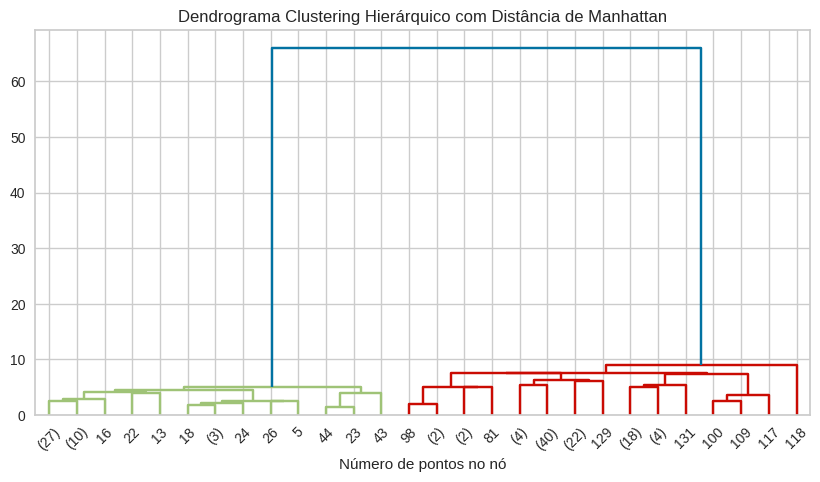

In [ ]:
from scipy.spatial.distance import pdist, squareform

# Definindo matriz de distâncias
dist_matrix = squareform(pdist(scaled_petals, 'cityblock'))

model = AgglomerativeClustering(affinity='manhattan', linkage='single', n_clusters=None, distance_threshold=0)

model.fit(dist_matrix)


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(10,5))
plt.title("Dendrograma Clustering Hierárquico com Distância de Manhattan")
plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Número de pontos no nó")
plt.show()


#Atividade 2